In [10]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 815kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 8.25MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 3.38MB/s]


In [2]:
import torch
torch.cuda.is_available()

True

In [7]:
tensor = torch.tensor([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]],dtype=torch.float32)

y1 = tensor @ tensor
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)
y3

tensor([[ 14.,  32.,  50.],
        [ 32.,  77., 122.],
        [ 50., 122., 194.]])

In [9]:
agg = tensor.sum()
print(agg, type(agg))

tensor(45.) <class 'torch.Tensor'>


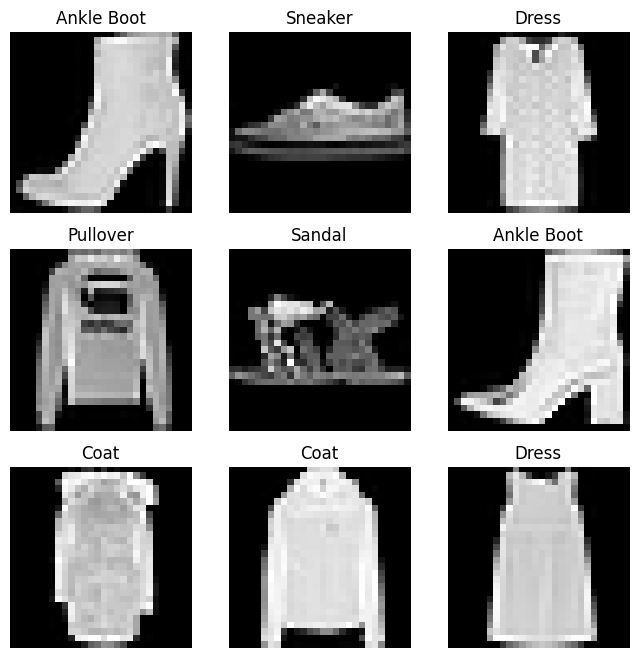

In [24]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [25]:
print(img.shape)  # veya print(img.size())


torch.Size([1, 28, 28])


In [27]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


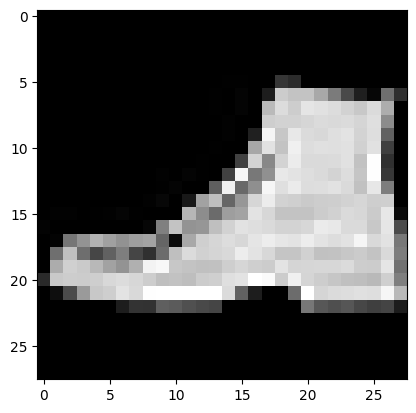

Label: 9


In [31]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() 
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [6]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [9]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [10]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0226,  0.0461, -0.2448,  0.1998, -0.2651, -0.0626,  0.2650,  0.2768,
          0.6538,  0.6269, -0.1067,  0.1419,  0.1447, -0.3631,  0.0213,  0.0457,
         -0.5180, -0.1943, -0.2139, -0.5625],
        [-0.0804, -0.0506, -0.1150,  0.2488, -0.0434, -0.0214,  0.2199, -0.0342,
          0.8612,  0.4865,  0.3752,  0.1014,  0.2577, -0.5855,  0.0178, -0.1616,
         -0.6826, -0.2032,  0.1246, -0.5134],
        [-0.0098,  0.2540,  0.1646,  0.3833, -0.0154,  0.0862,  0.2992,  0.2002,
          0.7014,  0.3458, -0.3345,  0.2013,  0.2122, -0.1494,  0.0151, -0.0813,
         -0.7318, -0.1265,  0.0663, -0.1638]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0226, 0.0461, 0.0000, 0.1998, 0.0000, 0.0000, 0.2650, 0.2768, 0.6538,
         0.6269, 0.0000, 0.1419, 0.1447, 0.0000, 0.0213, 0.0457, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2488, 0.0000, 0.0000, 0.2199, 0.0000, 0.8612,
         0.4865, 0.3752, 0.1014, 0.2577, 0.0000, 0.01

In [11]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [12]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [13]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0311, -0.0093,  0.0246,  ...,  0.0050, -0.0077, -0.0263],
        [-0.0287,  0.0332,  0.0038,  ..., -0.0279,  0.0032,  0.0215]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0332, -0.0077], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0204,  0.0310,  0.0334,  ..., -0.0312,  0.0384,  0.0338],
        [-0.0220,  0.0139,  0.0084,  ..., -0.0272, -0.0007,  0.0152]],
       device='cuda:0', grad_fn=<Sl

In [1]:
import torch
import torch.nn as nn

# 3 giriş → 2 çıkışlı bir Linear katman oluştur
layer = nn.Linear(in_features=3, out_features=2)

# Ağırlıklar (weight) ve bias'ı yazdır
print("Weight (Ağırlıklar):")
print(layer.weight)  # Rastgele başlatılan ağırlık matrisi

print("\nBias (Önyargı Terimi):")
print(layer.bias)  # Bias vektörü (eğer bias=False olsaydı, bias olmazdı)


Weight (Ağırlıklar):
Parameter containing:
tensor([[ 0.5483,  0.2269,  0.3035],
        [-0.5219,  0.3239,  0.5374]], requires_grad=True)

Bias (Önyargı Terimi):
Parameter containing:
tensor([ 0.1714, -0.3004], requires_grad=True)


In [12]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
print(w)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor([[ 1.2661, -1.6435, -1.3518],
        [-0.5556,  0.1025,  0.1428],
        [-0.5862,  0.0328, -1.0964],
        [-0.7311,  2.4296,  1.0560],
        [ 1.0140, -0.6004, -0.6163]], requires_grad=True)


tensor(1.0434, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [7]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x000002C14F50FA30>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000002C14F50E500>


In [13]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2649, 0.2187, 0.1271],
        [0.2649, 0.2187, 0.1271],
        [0.2649, 0.2187, 0.1271],
        [0.2649, 0.2187, 0.1271],
        [0.2649, 0.2187, 0.1271]])
tensor([0.2649, 0.2187, 0.1271])


In [ ]:
deneme = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)